In [2]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import math
import matplotlib as plt
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [3]:
d = pd.read_csv(r'C:\Users\natal\Documents\3. Semester\HIWI\DLC 2.NL\dlc analysis nl\2.NL_left-NG-2020-03-05\200221_DSC010495_NL2DLC_resnet50_2.NL_leftMar5shuffle1_603000.csv', names=['bodyparts_coords', 'leftear_x', 'leftear_y', 'leftear_likelihood', 'rightear_x', 'rightear_y', 'rightear_likelihood', 'nose_x', 'nose_y', 'nose_likelihood', 'tailbase_x', 'tailbase_y', 'tailbase_likelihood', 'object1_x', 'object1_y', 'object1_likelihood', 'object2_x', 'object2_y', 'object2_likelihood','upperleft_x', 'upperleft_y', 'upperleft_likelihood', 'upperright_x', 'upperright_y', 'upperright_likelihood', 'lowerleft_x', 'lowerleft_y', 'lowerleft_likelihood', 'lowerright_x', 'lowerright_y', 'lowerright_likelihood'], skiprows=10)
famerate=30
d['time in s']=d['bodyparts_coords'] / famerate
d

,bodyparts_coords,leftear_x,leftear_y,leftear_likelihood,rightear_x,rightear_y,rightear_likelihood,nose_x,nose_y,nose_likelihood,...,upperright_x,upperright_y,upperright_likelihood,lowerleft_x,lowerleft_y,lowerleft_likelihood,lowerright_x,lowerright_y,lowerright_likelihood,time in s
0,7,580.948975,276.555206,1.0,568.584656,279.034973,1.0,577.298645,287.417908,1.0,...,709.368042,54.149311,1.000000,315.796570,440.491669,0.999982,684.377136,436.821442,0.999524,0.233333
1,8,584.099426,277.277222,1.0,571.515442,282.218994,1.0,582.180969,289.107330,1.0,...,709.076660,55.158638,1.000000,315.218109,440.616486,0.999976,684.343262,436.909088,0.999734,0.266667
2,9,587.073120,280.125793,1.0,575.100525,286.487549,1.0,586.268555,292.416351,1.0,...,709.271667,55.236458,1.000000,315.463287,441.108521,0.999978,684.306763,437.155334,0.999621,0.300000
3,10,589.322937,281.890930,1.0,577.820312,288.932343,1.0,590.045044,293.295929,1.0,...,709.170837,56.931778,1.000000,315.324341,440.967926,0.999980,684.333252,436.851501,0.999668,0.333333
4,11,591.340820,281.957306,1.0,580.736755,290.231873,1.0,592.408569,293.342102,1.0,...,709.304871,55.536663,1.000000,315.006989,440.745422,0.999982,684.099731,437.414551,0.999717,0.366667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10943,10950,525.666626,126.262856,1.0,525.394409,110.558823,1.0,503.716492,118.188812,1.0,...,704.250671,56.129589,0.999978,317.565613,432.776459,0.999984,683.831665,433.798096,0.999827,365.000000
10944,10951,522.849426,125.470879,1.0,522.141663,109.329155,1.0,501.409698,116.726738,1.0,...,704.483215,58.062771,0.999978,317.697723,433.077698,0.999982,683.845825,433.882904,0.999813,365.033333
10945,10952,519.086121,124.114624,1.0,520.328369,107.681458,1.0,498.858856,114.919815,1.0,...,702.781067,58.340168,0.999980,319.452484,433.092499,0.999985,683.016541,433.441010,0.999811,365.066667
10946,10953,512.792969,122.145012,1.0,513.979797,108.068092,1.0,493.065643,114.483170,1.0,...,703.041504,56.391140,0.999962,317.631226,433.277252,0.999988,682.894287,433.597992,0.999748,365.100000


In [10]:
#corners
upleft_x = d.loc[:,"upperleft_x"].median()
upleft_y = d.loc[:,"upperleft_y"].median()
upright_x = d.loc[:,"upperright_x"].median()
upright_y = d.loc[:,"upperright_y"].median()
lowleft_x = d.loc[:,"lowerleft_x"].median()
lowleft_y = d.loc[:,"lowerleft_y"].median()
lowright_x = d.loc[:,"lowerright_x"].median()
lowright_y = d.loc[:,"lowerright_y"].median()

#objects
object1_x = d.loc[:,"object1_x"].median()
object1_y = d.loc[:,"object1_y"].median()
object2_x = d.loc[:,"object2_x"].median()
object2_y = d.loc[:,"object2_y"].median()

In [11]:
# centroid of head
d['nose_x'] = d['nose_x'].astype(float)
d['leftear_x'] = d['leftear_x'].astype(float)
d['rightear_x'] = d['rightear_x'].astype(float)
d['nose_y'] = d['nose_y'].astype(float)
d['leftear_y'] = d['leftear_y'].astype(float)
d['rightear_y'] = d['rightear_y'].astype(float)

centroid_y= d[['nose_y', 'leftear_y', 'rightear_y']]
centroid_x= d[['nose_x', 'leftear_x', 'rightear_x']]

centroid_y['centroid_y'] = centroid_y.mean(axis=1)
centroid_x['centroid_x'] = centroid_x.mean(axis=1)
centroid = centroid_x['centroid_x'], centroid_y['centroid_y']
centroid = pd.DataFrame(centroid)
centroid = centroid.T
centroid['mean_centroid'] = centroid.mean(axis=1)
centroid

C:\Users\natal\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
C:\Users\natal\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


,centroid_x,centroid_y,mean_centroid
0,575.610758,281.002696,428.306727
1,579.265279,282.867849,431.066564
2,582.814067,286.343231,434.578649
3,585.729431,288.039734,436.884583
4,588.162048,288.510427,438.336238
...,...,...,...
10943,518.259176,118.336830,318.298003
10944,515.466929,117.175591,316.321260
10945,512.757782,115.571966,314.164874
10946,506.612803,114.898758,310.755781


In [12]:
#change in position 
centroid['old_position'] = centroid['mean_centroid'].shift(1)
centroid['change in distance'] = abs(centroid['mean_centroid'] - centroid['old_position'])
#centroid = centroid.drop(centroid['change in distance' < 12].index)
centroid
centroid_x_max = centroid['centroid_x'].max()
centroid_x_min = centroid['centroid_x'].min()
centroid_y_max = centroid['centroid_y'].max()
centroid_y_min = centroid['centroid_y'].min()

px = (((centroid_x_max - centroid_x_min) + (centroid_y_max - centroid_y_min)) / 2 ) / 45
centroid / px

,centroid_x,centroid_y,mean_centroid,old_position,change in distance
0,63.388912,30.945313,47.167113,NaN,NaN
1,63.791365,31.150712,47.471039,47.167113,0.303926
2,64.182174,31.533438,47.857806,47.471039,0.386767
3,64.503227,31.720264,48.111746,47.857806,0.253940
4,64.771118,31.772099,48.271609,48.111746,0.159863
...,...,...,...,...,...
10943,57.073091,13.031798,35.052445,35.242819,0.190374
10944,56.765596,12.903917,34.834756,35.052445,0.217688
10945,56.467253,12.727318,34.597285,34.834756,0.237471
10946,55.790539,12.653181,34.221860,34.597285,0.375425


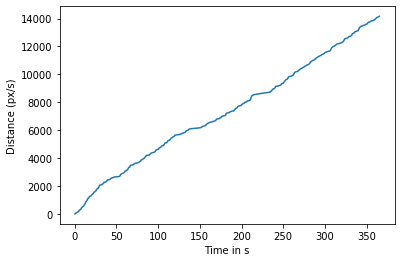

In [13]:
#plot distance
centroid['cumsum'] = np.cumsum(centroid['change in distance'])
plt.plot(d['time in s'],centroid['cumsum'])
plt.xlabel('Time in s')
plt.ylabel('Distance (px/s)')
plt.show()
mean_distance = centroid["change in distance"].mean()


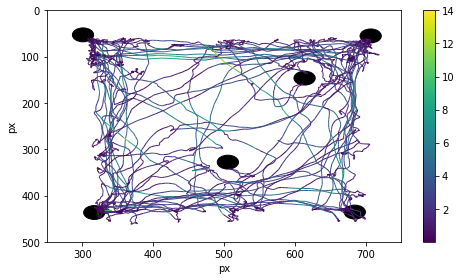

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm

x = centroid['centroid_x']
y = centroid['centroid_y']
v = centroid['change in distance']

#Create a set of line segments so that we can color them individually
# This creates the points as a N x 1 x 2 array so that we can stack points
# together easily to get the segments. The segments array for line collection
# needs to be (numlines) x (points per line) x 2 (for x and y)
points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)

# Plotting
fig, ax = plt.subplots(figsize=(7,4))

#fig = plt.figure()
#ax = fig.add_subplot(1, 1, 1)
corner1 = plt.Circle((upright_x,upright_y), 15, color='black')
corner2 = plt.Circle((upleft_x,upleft_y), 15, color='black')
corner3 = plt.Circle((lowleft_x,lowleft_y), 15, color='black')
corner4 = plt.Circle((lowright_x,lowright_y), 15, color='black')
object1 = plt.Circle((object1_x,object1_y), 15, color='black')
object2 = plt.Circle((object2_x,object2_y), 15, color='black')
ax.add_artist(corner1)
ax.add_artist(corner2)
ax.add_artist(corner3)
ax.add_artist(corner4)
ax.add_artist(object1)
ax.add_artist(object2)
plt.gca().invert_yaxis()

# Create a continuous norm to map from data points to colors
norm = plt.Normalize(v.min(), v.max())
norm = plt.Normalize(v.min(), 14)
lc = LineCollection(segments, cmap='viridis', norm=norm)
# Set the values used for colormapping
lc.set_array(v)
lc.set_linewidth(1)
line = ax.add_collection(lc)
fig.colorbar(line, ax=ax)

# Setting lim here is important, otherwise can't show fig properly
ax.set_xlim(x.min(), x.max())
ax.set_ylim(y.min(), y.max())

plt.xlim(250,750)
plt.ylim(0,500)

plt.xlabel('px')
plt.ylabel('px')

plt.gca().invert_yaxis() # Just to align the plot with real camera settings
#plt.title(str(Path(video).stem)+' '+bpt+' trajectory with velocity')
plt.tight_layout()
plt.show()

In [17]:
centroid['distance_1'] = np.sqrt(((centroid['centroid_x'] - object1_x)**2) + ((centroid['centroid_y'] - object1_y)**2))
centroid['distance_2'] = np.sqrt(((centroid['centroid_x'] - object2_x)**2) + ((centroid['centroid_y'] - object2_y)**2))
centroid['cm_distance1'] = centroid['distance_2'] / px
centroid['cm_distance2']  = centroid['distance_1'] / px
centroid

,centroid_x,centroid_y,mean_centroid,old_position,change in distance,cumsum,distance_1,distance_2,cm_distance1,cm_distance2
0,575.610758,281.002696,428.306727,NaN,NaN,NaN,139.972598,84.442502,9.299198,15.414428
1,579.265279,282.867849,431.066564,428.306727,2.759837,2.759837,140.830221,86.522622,9.528270,15.508874
2,582.814067,286.343231,434.578649,431.066564,3.512085,6.271922,143.396409,87.879591,9.677706,15.791474
3,585.729431,288.039734,436.884583,434.578649,2.305934,8.577855,144.460733,89.694198,9.877539,15.908682
4,588.162048,288.510427,438.336238,436.884583,1.451655,10.029510,144.472653,91.677556,10.095955,15.909995
...,...,...,...,...,...,...,...,...,...,...
10943,518.259176,118.336830,318.298003,320.026718,1.728715,14152.261962,99.462889,209.905019,23.115709,10.953312
10944,515.466929,117.175591,316.321260,318.298003,1.976743,14154.238705,102.469563,210.911727,23.226572,11.284421
10945,512.757782,115.571966,314.164874,316.321260,2.156386,14156.395091,105.525665,212.401806,23.390667,11.620973
10946,506.612803,114.898758,310.755781,314.164874,3.409093,14159.804184,111.606111,212.949582,23.450990,12.290580


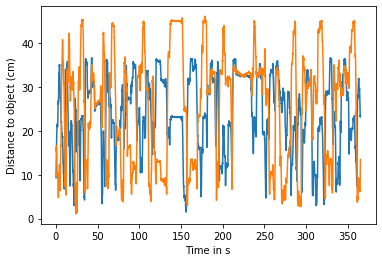

In [18]:
plt.plot(d['time in s'], centroid['cm_distance1'])
plt.plot(d['time in s'], centroid['cm_distance2'])
plt.xlabel('Time in s')
plt.ylabel('Distance to object (cm)')
plt.show()

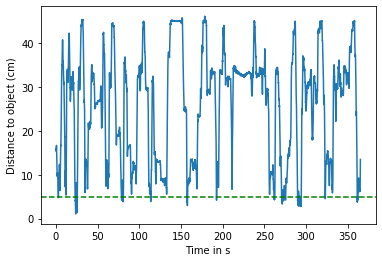

In [19]:
plt.plot(d['time in s'], centroid['cm_distance2'])
plt.axhline(y = 5, color='green', linestyle='--', linewidth=1.5)
plt.xlabel('Time in s')
plt.ylabel('Distance to object (cm)')
plt.show()

In [21]:
#time near object2
time1 = centroid[centroid["cm_distance1"] < 5].count()["cm_distance1"]
time1 = time1 / px


#time near object2
time2 = centroid[centroid["cm_distance2"] < 5].count()["cm_distance2"]
time2 = time2 / px